In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearnearn import linear_model

In [2]:
train = pd.read_csv("House_train.csv")

In [3]:
train = train[(train.GrLivArea < 4600)]

In [4]:
from math import log10
train.SalePrice = train.SalePrice.apply(lambda x: log10(x))

In [5]:
#excludes the insignificant categorials
y = train.SalePrice.values
X = train.drop(["SalePrice", "Id", 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'ExterCond', 'Fireplaces', 'Functional', 
                'GarageCond', 'HalfBath', 'KitchenAbvGr', 'LandSlope', 'MiscVal', 'BsmtUnfSF',  'GarageArea'], axis = 1).values

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

c:\programdata\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
regressor = linear_model.ARDRegression()
regressor.fit(X_train, y_train)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False)

In [34]:
regressor = linear_model.BayesianRidge()  - tune

regressor.fit(X_train, y_train)
rmse_cv(regressor)

TypeError: fit() missing 1 required positional argument: 'y'

In [140]:
y_pred = regressor.predict(X_test)

# RMean square error calculation and model tuning

In [10]:
from sklearn.model_selection import cross_val_score
def rmse_cv(regressor):
    rmse= np.sqrt(-cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [125]:
alphas_1 = [10000, 700000, 550000]
#alphas = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
alphas_2 = np.linspace(0.000001, 0.00001, 10)
ridge_fr = pd.DataFrame({'alpha-1': []})#, '0.0001' : [], '0.0005' : [], '0.001' : [], '0.005' : []})
ridgelist = []
for alpha_1 in alphas_1:
    ridgelist.append(rmse_cv(linear_model.ARDRegression(threshold_lambda = alpha_1)).mean())
ridge_fr[tol] = ridgelist
ridge_fr['alpha-1'] = alphas_1
##plt.plot(alphas, ridgelist)
#plt.xlabel('Alpha')
#plt.title('Lasso RMSE')
#plt.ylabel('RMSE')
ridge_fr

,alpha-1,1e-05
0,10000,0.070183
1,700000,0.051031
2,550000,0.051031


IndexError: single positional indexer is out-of-bounds

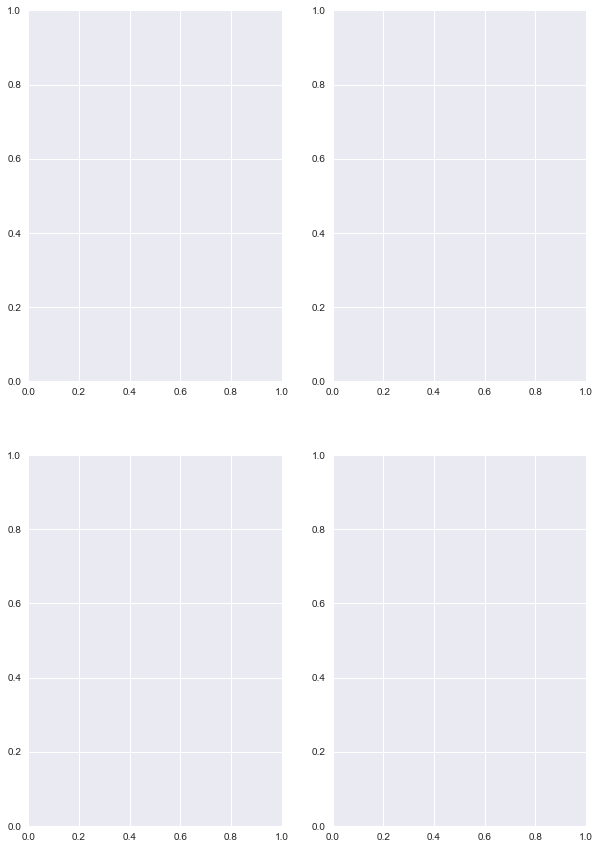

In [73]:
col_ = [0, 0, 1, 0, 1]
row_ = [0, 0, 0, 1, 1]
tols = [0, 0.00001, 0.0005, 0.001, 0.005]

fig, axes = plt.subplots(2,2, figsize=(10,15), squeeze=False) 
for i in range(1, 5):
    axes[row_[i], col_[i]].plot(ridge_fr['alpha'], ridge_fr.iloc[:, i] )
    axes[row_[i], col_[i]].set_title('Ridge cross validation for %s' %tols[i])
    axes[row_[i], col_[i]].set_xlabel('Alpha')
    axes[row_[i], col_[i]].set_ylabel('rmse')


In [128]:
#Optimal parameters for Ridge regression
regressor = linear_model.ARDRegression(threshold_lambda=500000)
regressor.fit(X_train, y_train)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=500000, tol=0.001, verbose=False)

# Fitting to test set

In [26]:
test = pd.read_csv("House_test.csv")
X_predict = test.drop(["SalePrice", "Id", 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'ExterCond', 'Fireplaces', 'Functional', 
                'GarageCond', 'HalfBath', 'KitchenAbvGr', 'LandSlope', 'MiscVal', 'BsmtUnfSF',  'GarageArea'], axis = 1).values


In [27]:
y_pred = regressor.predict(X_predict)
y_pred1 = [pow(10,x) for x in y_pred]

In [28]:
pred = pd.DataFrame(test.Id, columns=['Id', 'SalePrice'])
pred.SalePrice = y_pred1

In [29]:
pred.to_csv("Houses_prediction.csv", index = False)

In [30]:
pred

,Id,SalePrice
0,1461,93379.800731
1,1462,161284.770109
2,1463,190596.610587
3,1464,213418.270542
4,1465,179347.209597
5,1466,176709.305652
6,1467,176555.871268
7,1468,168194.195230
8,1469,188034.098460
9,1470,112338.364138
